# Análisis de datos Synergy Logistics 
## Propuesta Operativa 2021
> Por Diana Aviles

<hr>
<b> Descripción del código </b>
<br> <br>
<i> Importamos las librerías </i>

In [4]:
import pandas as pd
import seaborn as sns #para graficar
import matplotlib.pyplot as pl #para guardar el grafico en imagen


<i> Abrimos la base de datos a analizar </i>

In [9]:
data = pd.read_csv('synergy_logistics_database.csv', index_col = 0, parse_dates = [5])
#data.info()


<br>


### RUTAS MÁS DEMANDADAS
<hr>

<i> Analizaremos las rutas demandadas dependiendo su dirección, origen y destino, se filtra la base de datos con esta información para dar el porcentaje de ganancias y el total servicios por ruta</i>

In [102]:
rutas_demandadas = data.groupby(by=['direction', 'origin','destination'])
suma = rutas_demandadas.sum()['total_value']
rutas_demandadas = rutas_demandadas['total_value'].describe()
rutas_demandadas['suma_total'] = suma
rutas_demandadas = rutas_demandadas.reset_index()


> Exportaciones

In [103]:
#Exportaciones

exportaciones = rutas_ordenadas[rutas_ordenadas['direction'] == 'Exports']
mas_usadas = exportaciones.sort_values('count', ascending= False).head(10)

valor_total_exportaciones = exportaciones['suma_total'].sum()
top = mas_usadas.suma_total.sum()

total_usos = mas_usadas['count'].sum()
porcentaje_ganancias = (top/ valor_total_exportaciones)*10000
porcentaje_ganancias = int(porcentaje_ganancias)/100

print('\nLas rutas más demandadas en Exportaciones son:\n')
print(mas_usadas.iloc[:, 1:4])
print(f'\nLas 10 rutas mas demandadas en Exportaciones aportan {porcentaje_ganancias}% de las ganacias, en un total de {total_usos} servicios')


Las rutas más demandadas en Exportaciones son:

          origin  destination  count
118  South Korea      Vietnam  497.0
95   Netherlands      Belgium  437.0
135          USA  Netherlands  436.0
32         China       Mexico  330.0
75         Japan       Brazil  306.0
51       Germany       France  299.0
115  South Korea        Japan  279.0
3      Australia    Singapore  273.0
24        Canada       Mexico  261.0
35         China        Spain  250.0

Las 10 rutas mas demandadas en Exportaciones aportan 28.13% de las ganacias, en un total de 3368.0 servicios


> Importaciones

In [104]:
#Importaciones
importaciones = rutas_ordenadas[rutas_ordenadas['direction'] == 'Imports']
mas_usadas = importaciones.sort_values('count', ascending= False).head(10)

valor_total_exportaciones = exportaciones['suma_total'].sum()
top = mas_usadas.suma_total.sum()

total_usos = mas_usadas['count'].sum()
porcentaje_ganancias = (top/ valor_total_exportaciones)*10000
porcentaje_ganancias = int(porcentaje_ganancias)/100

print('\nLas rutas más demandadas en Importaciones son:\n')
print(mas_usadas.iloc[:, 1:4])
print(f'\nLas 10 rutas mas demandadas en Importaciones aportan {porcentaje_ganancias}% de las ganacias, en un total de {total_usos} servicios')


Las rutas más demandadas en Importaciones son:

        origin           destination  count
177  Singapore              Thailand  273.0
156    Germany                 China  233.0
148      China                 Japan  210.0
164      Japan                Mexico  206.0
151      China              Thailand  200.0
170   Malaysia              Thailand  195.0
182      Spain               Germany  142.0
175     Mexico                   USA  122.0
153      China  United Arab Emirates  114.0
145     Brazil                 China  113.0

Las 10 rutas mas demandadas en Importaciones aportan 17.47% de las ganacias, en un total de 1808.0 servicios


### MEDIO DE TRANSPORTE MÁS UTILIZADO POR AÑO

In [110]:
#Medio de transporte más utilizado por Exportación
exportaciones_transporte = data[data['direction'] == 'Exports']
transporte_masUsado_anual_E = exportaciones_transporte.groupby(by = ['year','transport_mode'])
valor_anual_transporte_E = transporte_masUsado_anual_E['total_value'].agg(pd.Series.sum)

top_transporte_E = pd.DataFrame()
top_transporte_E['valor_total']= valor_anual_transporte_E
top_transporte_E['frecuencia'] = transporte_masUsado_anual_E['total_value'].describe()['count']
top_transporte_E = top_transporte_E.sort_values(by = ['year', 'frecuencia'], ascending= False)

print(top_transporte_E)

                     valor_total  frecuencia
year transport_mode                         
2020 Sea             13762190000      1481.0
     Rail             8510363000       532.0
     Air              6978599000       312.0
     Road              967088000       222.0
2019 Sea              9930953000      1299.0
     Road             8732171000       668.0
     Rail             4522366000       327.0
     Air              7544995000       278.0
2018 Sea             10338148000      1051.0
     Rail            10146394000       700.0
     Road             5872062000       495.0
     Air              1076374000       326.0
2017 Sea             10016463000      1611.0
     Air              8777068000       504.0
     Rail             5108234000       378.0
     Road             1473000000        80.0
2016 Sea             13189041000      1572.0
     Rail             4260198000       439.0
     Road             3247088000       280.0
     Air              2915111000       274.0
2015 Sea  

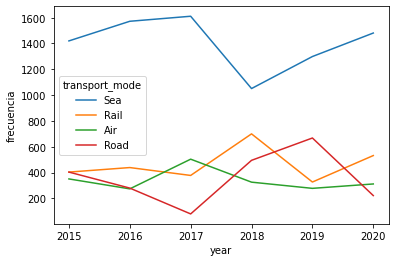

In [111]:
#Grafica Transportes Exportaciones
sns.lineplot(data = top_transporte_E, x='year', y='frecuencia', hue='transport_mode')
plt.savefig('Top_transporte_Exportaciones.png')

In [113]:
#Medio de transporte más utilizado por Importación
importaciones_transporte = data[data['direction'] == 'Imports']
transporte_masUsado_anual_I = importaciones_transporte.groupby(by = ['year','transport_mode'])
valor_anual_transporte_I = transporte_masUsado_anual_I['total_value'].agg(pd.Series.sum)

top_transporte_I = pd.DataFrame()
top_transporte_I['valor_total']= valor_anual_transporte_I
top_transporte_I['frecuencia'] = transporte_masUsado_anual_I['total_value'].describe()['count']
top_transporte_I = top_transporte_I.sort_values(by = ['year', 'frecuencia'], ascending= False)

print(top_transporte_I)

                     valor_total  frecuencia
year transport_mode                         
2020 Sea              6094000000       421.0
     Road             2086000000        88.0
     Rail             1401000000        50.0
     Air               241000000        49.0
2019 Sea              8556000000       514.0
     Air              1493000000        80.0
     Rail              162000000        14.0
2018 Sea              7204000000       425.0
     Air              1381000000        73.0
     Road              630000000        61.0
     Rail              486000000        49.0
2017 Rail             3375000000       282.0
     Sea              4822000000       263.0
     Air               288000000        32.0
     Road              569000000        31.0
2016 Sea              5311000000       432.0
     Rail             1219000000        68.0
     Road             1463000000        64.0
     Air               544000000        44.0
2015 Road             1242000000       205.0
     Sea  

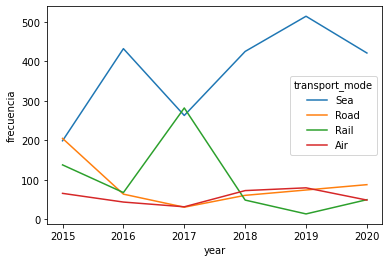

In [115]:
#Grafica Transportes Importaciones
sns.lineplot(data = top_transporte_I, x='year', y='frecuencia', hue='transport_mode')
plt.savefig('Top_transporte_Importaciones.png')

### VALOR TOTAL DE IMPORTACIONES Y EXPORTACIONES


In [136]:
ganancias_E= exportaciones.groupby(by=['origin']).sum()
valor_total_EX = ganancias_E['suma_total'].sum()
ganancias_E['porcentaje'] = (ganancias_E['suma_total']/ valor_total_EX)*100

ganancias_E = ganancias_E.sort_values('porcentaje',ascending = False)
suma_porcentaje_E = ganancias_E.cumsum()['porcentaje']


ganancias_E['porcentaje_acumulado'] = suma_porcentaje_E

paises_mas_80_valor_E = ganancias_E[ ganancias_E['porcentaje_acumulado'] > 80]

print('\n Paises con +80% valor en Exportaciones:\n ')
print(paises_mas_80_valor_E.iloc[:,[0,-1]])



 Paises con +80% valor en Exportaciones:
 
                count  porcentaje_acumulado
origin                                     
Canada          603.0             82.270433
Italy           562.0             85.621191
Netherlands     796.0             88.193796
Spain           295.0             90.327868
United Kingdom  871.0             92.062105
India           565.0             93.701682
Belgium         243.0             95.317533
Brazil          396.0             96.737334
Switzerland     249.0             98.082211
Australia       863.0             99.112410
Mexico          772.0             99.998852
Austria         437.0             99.999573
Singapore       264.0            100.000000


In [138]:
ganancias_I= importaciones.groupby(by=['origin']).sum()
valor_total_IM = ganancias_I['suma_total'].sum()
ganancias_I['porcentaje'] = (ganancias_I['suma_total']/ valor_total_IM)*100

ganancias_I = ganancias_I.sort_values('porcentaje',ascending = False)
suma_porcentaje_I = ganancias_I.cumsum()['porcentaje']


ganancias_I['porcentaje_acumulado'] = suma_porcentaje_I

paises_mas_80_valor_I = ganancias_I[ ganancias_I['porcentaje_acumulado'] > 80]

print('\n Paises con +80% valor en Importaciones:\n ')
print(paises_mas_80_valor_I.iloc[:,[0,-1]])



 Paises con +80% valor en Importaciones:
 
                      count  porcentaje_acumulado
origin                                           
Malaysia              199.0             82.760049
Spain                 183.0             88.164530
France                169.0             90.534505
Italy                  86.0             92.818038
Australia             102.0             94.474860
Russia                 42.0             96.007420
Canada                 47.0             97.032128
Vietnam                18.0             98.004610
Brazil                119.0             98.885247
United Arab Emirates   20.0             99.553378
United Kingdom         58.0            100.000000
